<a href="https://colab.research.google.com/github/dhyatt4198/CS4410-_Homework/blob/main/CS4410_Homework5_DylanHyatt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 15.18 Project: Determine k in k-Means Clustering on page 661.  Use elbow method to determine optimal k (the number of classes) for k-Means Clustering on iris dataset only.  Produce the Elbow Method graph below as well:
## 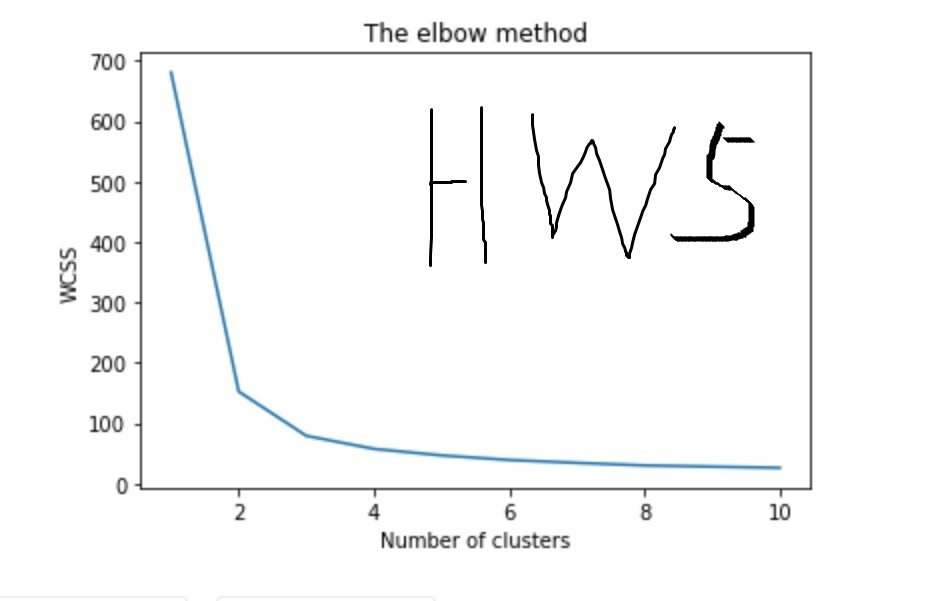

## Steps:

### Import Libraries

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

### Load the Iris Dataset

In [22]:
iris = load_iris()
X = iris.data
print("Shape of the dataset:", X.shape)

Shape of the dataset: (150, 4)


### Compute WCSS for Different Values of k

In [23]:
# list to store WCSS
wcss = []

# run KMeans for k = 1 to 10
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

  print("WCSS values for k = 1 to 10", wcss)

WCSS values for k = 1 to 10 [681.3705999999996]
WCSS values for k = 1 to 10 [681.3705999999996, 152.34795176035797]
WCSS values for k = 1 to 10 [681.3705999999996, 152.34795176035797, 78.851441426146]
WCSS values for k = 1 to 10 [681.3705999999996, 152.34795176035797, 78.851441426146, 57.22847321428572]
WCSS values for k = 1 to 10 [681.3705999999996, 152.34795176035797, 78.851441426146, 57.22847321428572, 46.46117267267268]
WCSS values for k = 1 to 10 [681.3705999999996, 152.34795176035797, 78.851441426146, 57.22847321428572, 46.46117267267268, 39.03998724608725]
WCSS values for k = 1 to 10 [681.3705999999996, 152.34795176035797, 78.851441426146, 57.22847321428572, 46.46117267267268, 39.03998724608725, 34.305815295815314]
WCSS values for k = 1 to 10 [681.3705999999996, 152.34795176035797, 78.851441426146, 57.22847321428572, 46.46117267267268, 39.03998724608725, 34.305815295815314, 30.132440554614483]
WCSS values for k = 1 to 10 [681.3705999999996, 152.34795176035797, 78.851441426146, 5

### Plot the Elbow Method Graph

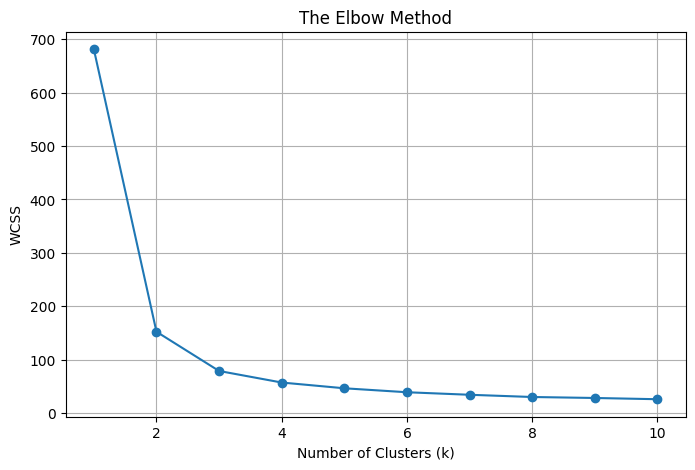

In [24]:
# plotting the results
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Get MNIST dataset as the instructions in 15.21. Use PCA dimensional reduction for logistic regression on MNIST to show how much PCA can help to speed up logistic regression.  For example, show the time difference and accuracy score values before and after applying PCA dimensional reduction.

## Steps:

### Install/Import Libraries

In [25]:
import time
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

### Load MNIST Dataset

In [26]:
print("Loading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

print("Shape of dataset:", X.shape)
print("Number of Labels:", len(np.unique(y)))

#convert labels to integers
y = y.astype(int)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Loading MNIST dataset...
Shape of dataset: (70000, 784)
Number of Labels: 10


### Standardize the Data

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression (NO PCA)

In [28]:
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=1000, n_jobs=-1)

start_time = time.time()
logisticRegr.fit(X_train_scaled, y_train)
train_time_no_pca = time.time() - start_time

y_pred_no_pca = logisticRegr.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)

print("Logistic Regression (Without PCA)")
print(f"Training Time: {train_time_no_pca:.2f} seconds")
print(f"Accuracy: {accuracy_no_pca:.4f}")

Logistic Regression (Without PCA)
Training Time: 46.20 seconds
Accuracy: 0.9154


### Apply PCA

In [29]:
pca = PCA(0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Original number of features:", X_train_scaled.shape[1])
print("Reduced number of features after PCA:", X_train_pca.shape[1])

Original number of features: 784
Reduced number of features after PCA: 330


### Logistic Regression with PCA

In [30]:
logisticRegr_pca = LogisticRegression(solver='lbfgs', max_iter=1000, n_jobs=-1)

start_time = time.time()
logisticRegr_pca.fit(X_train_pca, y_train)
train_time_pca = time.time() - start_time

y_pred_pca = logisticRegr_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("Logistic Regression (With PCA)")
print(f"Training Time: {train_time_pca:.2f} seconds")
print(f"Accuracy: {accuracy_pca:.4f}")

Logistic Regression (With PCA)
Training Time: 35.06 seconds
Accuracy: 0.9217


### Compare Results

In [31]:
print("\n   Comparison of Logistic Regression Performance   ")
print(f"Time (Without PCA): {train_time_no_pca:.2f}s | Accuracy: {accuracy_no_pca:.4f}")
print(f"Time (With PCA): {train_time_pca:.2f}s | Accuracy: {accuracy_pca:.4f}")


   Comparison of Logistic Regression Performance   
Time (Without PCA): 46.20s | Accuracy: 0.9154
Time (With PCA): 35.06s | Accuracy: 0.9217
